# Applied 8
## Imports


In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [2]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


## Response and Predicotr

In [3]:
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
      'lstat': Auto['horsepower']})
Y  = Auto['mpg']


## Fitting a model

In [4]:
model = sm.OLS(Y, X) #Ordinary Least Squares
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        10:57:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

## Summaraizing a results

In [5]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
lstat,-0.1578,0.006,-24.489,0.0


## Plotting a result

In [6]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

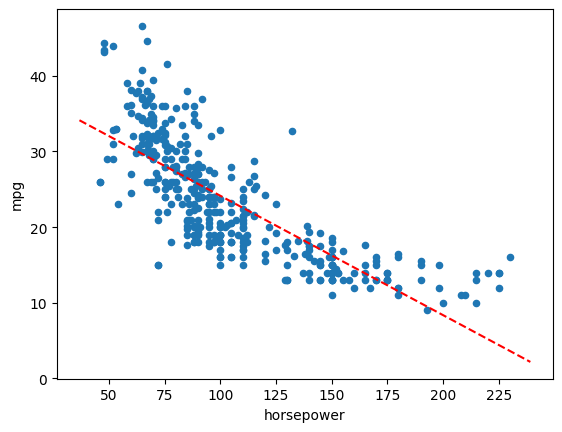

In [7]:
from matplotlib.pyplot import axline

ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, results.params.iloc[0], results.params.iloc[1], 'r--')

## Questions
### i. 
Basing on plot, low p-value and relatively high t-static there is a relation between horsepower and mpg
### ii. 
As far as std of lstat (slope) is very low it must be a strong relation.
### iii. 
The relation is negative (basing on the plot you can see it) as negative lstat (with low std) suggests that data is decreasing
### iv.

In [8]:
y=results.get_prediction((1,98))
print("prediction: " + str(y.predicted_mean))
print("confidence intervals: " + str(y.conf_int(alpha=0.05)))

prediction: [24.46707715]
confidence intervals: [[23.97307896 24.96107534]]


It says that with 95% probability the for horsepower=98 mpg is in range of [23.97, 24.96]. 

## Diagnostic Plots

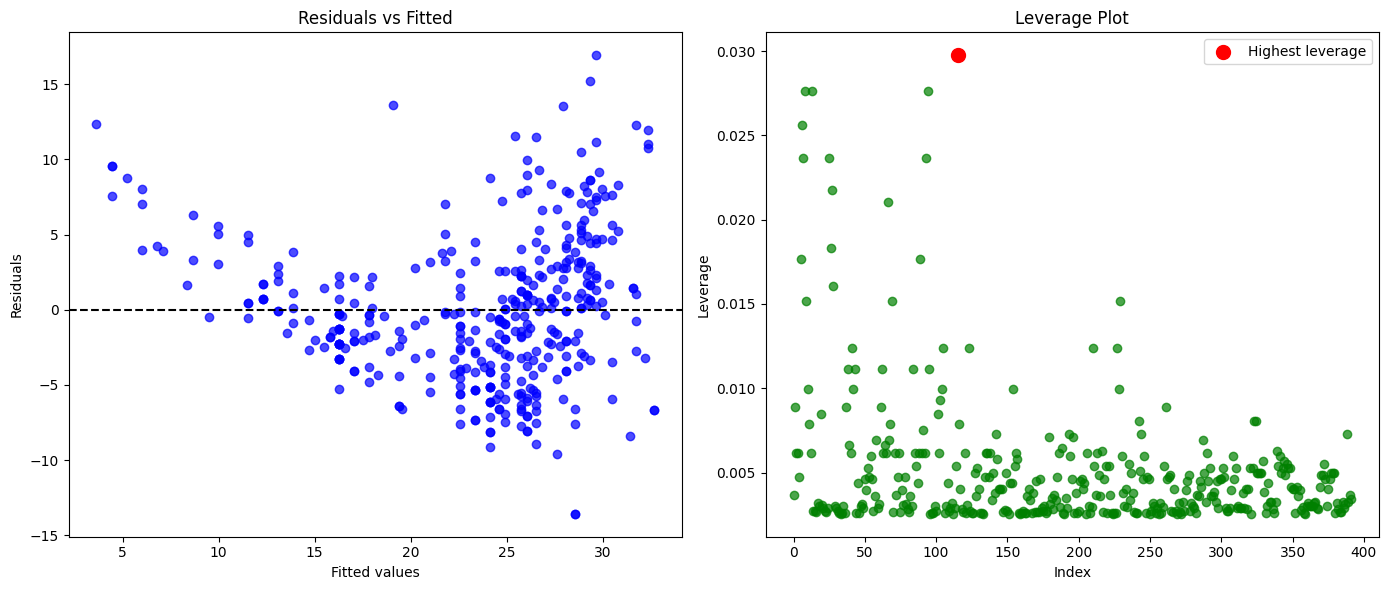

In [9]:
import matplotlib.pyplot as plt

# Assume results is your fitted sm.OLS model
infl = results.get_influence()
leverage = infl.hat_matrix_diag
residuals = results.resid
fitted = results.fittedvalues

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Residuals vs Fitted
axes[0].scatter(fitted, residuals, color='blue', alpha=0.7)
axes[0].axhline(0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted')

# 2️⃣ Leverage plot
axes[1].scatter(np.arange(len(leverage)), leverage, color='green', alpha=0.7)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Leverage')
axes[1].set_title('Leverage Plot')

# Highlight the most influential point in leverage plot
most_influential = np.argmax(leverage)
axes[1].scatter(most_influential, leverage[most_influential], color='red', s=100, label='Highest leverage')
axes[1].legend()

plt.tight_layout()
plt.show()

## Comment on Plots
### Residual vs Fitted
As we can see ont the fitted values vs residuals the erros is growing along with fitted values. However we should note that that most point in low values (0,10) are underestimated.

### Levrage Point
Look below for calculated:
$$
\frac{1+p}{n}
$$

As Levrage is not generally exceeding 0.005 (calculated below) we could assume the fit is relatively good. On the other side there is plenty of points with high levrage for low indexes.

### Summary
Both plots suggests that there is a problem in small fitted values. As for "big" numbers relation is linear. You can say it about low numbers.

In [10]:
## Aditional calc for levrage
h_help = 2/X.shape[0]
print(h_help)

0.00510204081632653


In [11]:
%reset

Nothing done.


# Applied 9

## Imports

In [12]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


## Data set

In [13]:
Data = load_data('Auto')
Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


## Scatterplot Matrix

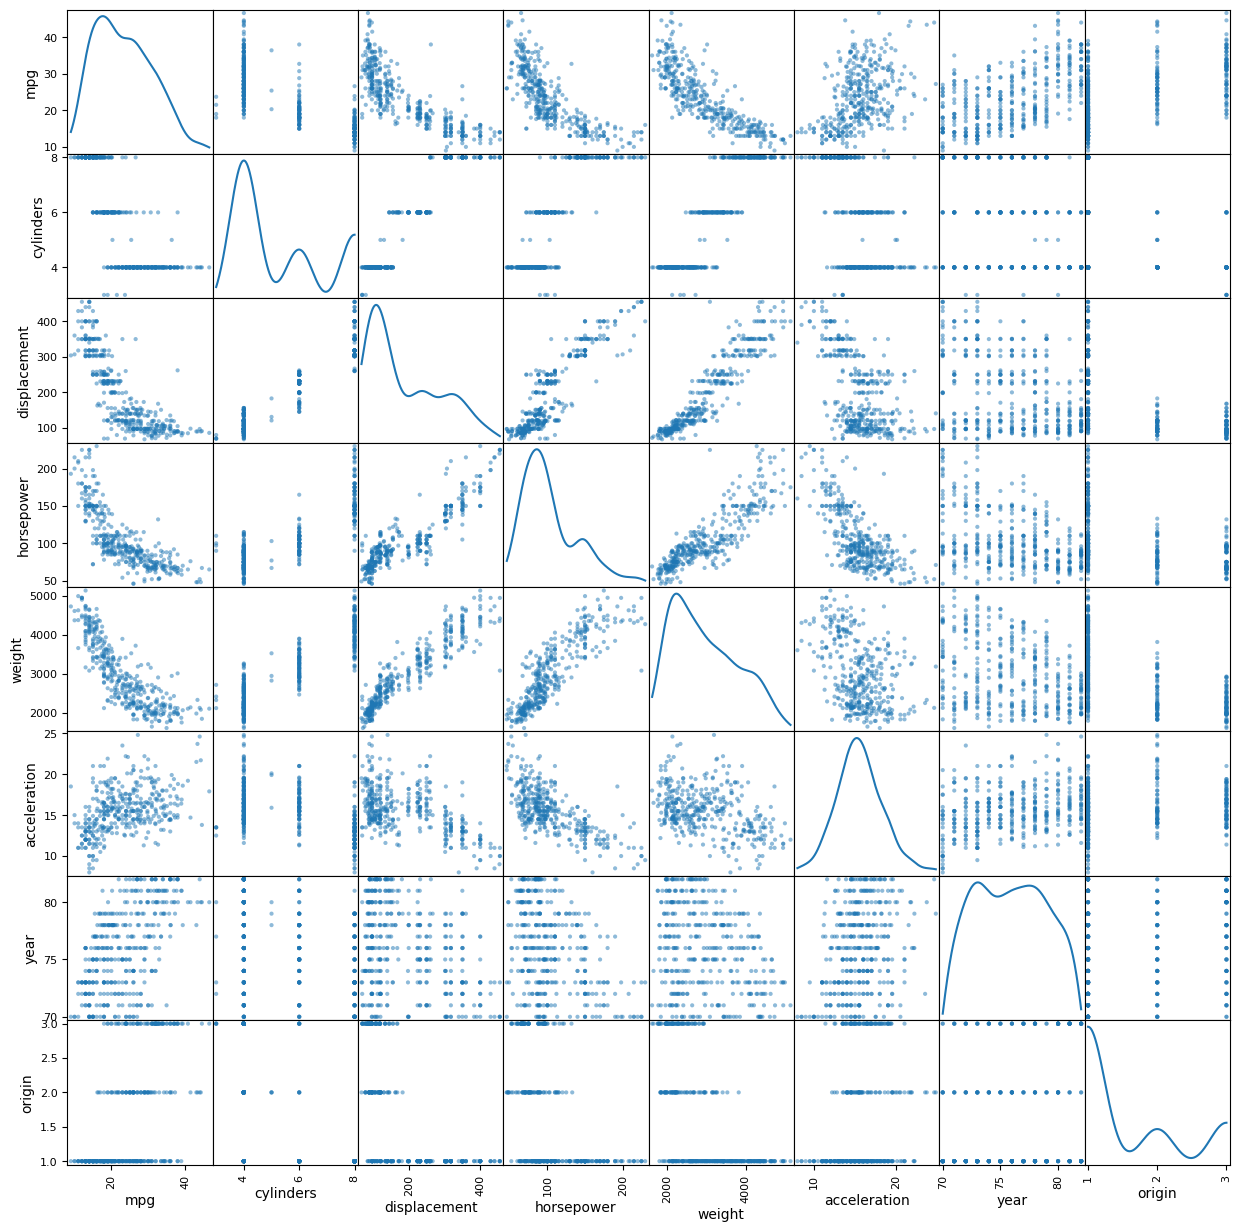

In [14]:
scatter_matrix(Data, figsize=(15, 15), diagonal='kde')
plt.show()

## Matrix of Correlations

In [15]:
Data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Model

In [16]:
X = Data[["cylinders", "displacement", "horsepower", "horsepower", "weight", 
          "acceleration","year","origin"]]
Y = Data['mpg']

model = sm.OLS(Y, X) 
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Sun, 16 Nov 2025   Prob (F-statistic):                        0.00
Time:                        10:57:38   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## Summarazing

In [17]:
summarize(results)

,coef,std err,t,P>|t|
cylinders,-0.7055,0.323,-2.181,0.030
displacement,0.0219,0.008,2.871,0.004
horsepower,-0.0198,0.006,-3.147,0.002
horsepower,-0.0198,0.006,-3.147,0.002
weight,-0.0060,0.001,-9.258,0.000
acceleration,-0.0796,0.090,-0.881,0.379
year,0.5836,0.024,24.150,0.000
origin,1.3100,0.281,4.663,0.000


## i.
Assuming that most of them has a low p-value and high F-statistic there is a relation between data

In [18]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming your Data DataFrame has these columns:
# 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'

# Use formula: response ~ predictors
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

# Fit model using ols (formula interface)
results = ols(formula, data=Data).fit()

# Print summary
print(results.summary())

# Perform ANOVA
anova_results = anova_lm(results, typ=1)
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.04e-139
Time:                        10:57:39   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

## ii.
All of them expect `acceleration` as it has high p-value=0.76

## iii.
The coefficient for the year $\beta=0.5836$ suggests that relation between mpg and year is positive. As we can see that every decade the mpg is increasing aorund 5.84 ($0.584 * 10).

## Diagnostic Plots

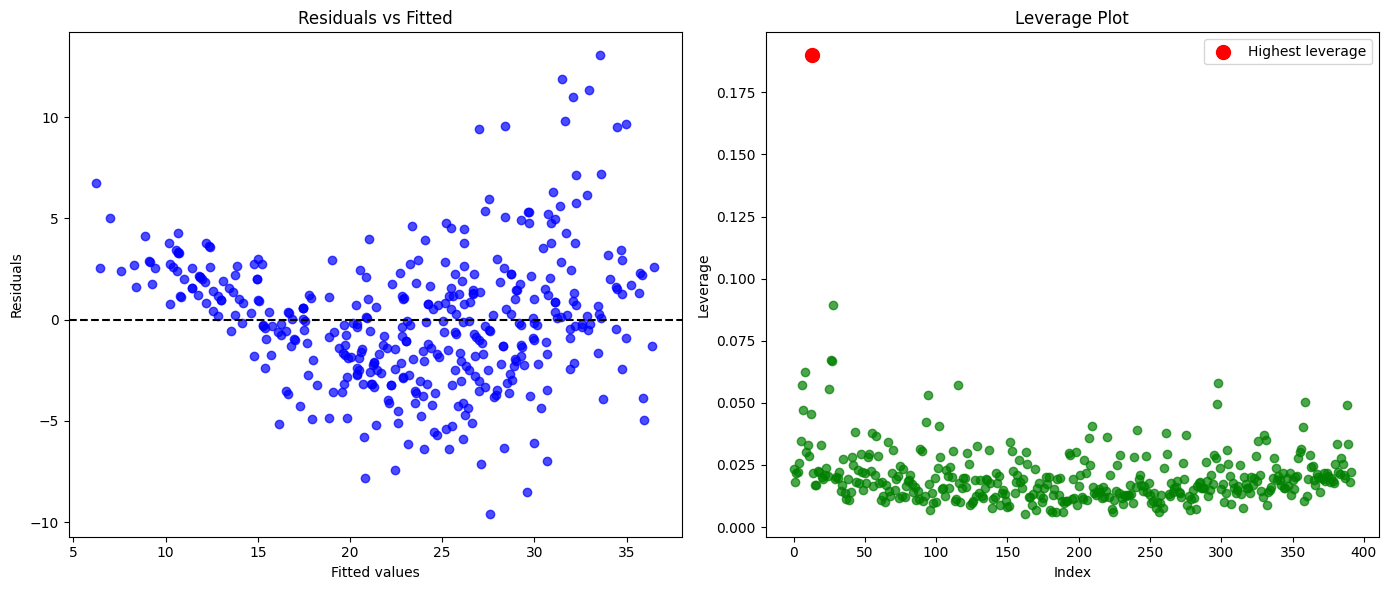

In [19]:
import matplotlib.pyplot as plt

# Assume results is your fitted sm.OLS model
infl = results.get_influence()
leverage = infl.hat_matrix_diag
residuals = results.resid
fitted = results.fittedvalues

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Residuals vs Fitted
axes[0].scatter(fitted, residuals, color='blue', alpha=0.7)
axes[0].axhline(0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted')

# 2️⃣ Leverage plot
axes[1].scatter(np.arange(len(leverage)), leverage, color='green', alpha=0.7)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Leverage')
axes[1].set_title('Leverage Plot')

# Highlight the most influential point in leverage plot
most_influential = np.argmax(leverage)
axes[1].scatter(most_influential, leverage[most_influential], color='red', s=100, label='Highest leverage')
axes[1].legend()

plt.tight_layout()
plt.show()

## Comment
### Residuals vs Fitted
We can conclude the same thing as in taks 8. The resiudals are growing along with predictors values and there is underestimation for low predictors values.

### Levrage points
Considering the expected levrage calculated below. Nearly All points are more-less not impacting a model. There is one outsider with high impact for the regression at the low index.

### Summary
The outsider form Leverage Plot profes a pure fit of the model for low predictor values. There we cleary see underestimation for the smallest predictor values. 


In [20]:
## Aditional calc for levrage
h_help = (1 + X.shape[1])/X.shape[0]
print(h_help)

0.02295918367346939


## Fitting a model with intercept

In [21]:
from statsmodels.formula.api import ols
# Assuming your Data DataFrame has these columns:
# 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'
predictors=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
formula = 'mpg ~ '
for p in predictors:
    for p2 in predictors:
        if(p != p2):
            formula += f'{p}*{p2} + '
formula = formula[:len(formula)-3]
#print(formula)


# Interaction between year and weight
model_interaction = ols(formula, data=Data).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          4.01e-155
Time:                        10:57:41   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The coeficients of compinations are small, as only a few p values are slightly below 0.005. The compinations with `acceleration` seems slightly important, but we assume the `acceleration` is not statisticly important

## The Transformations

In [22]:
# Define the formula
formula = 'mpg ~ I(cylinders**2) + I(horsepower**2) + np.sqrt(origin) + np.log(year) + weight * year'

# Fit the model
model_interaction = ols(formula, data=Data).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     299.6
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.63e-151
Time:                        10:57:41   Log-Likelihood:                -995.46
No. Observations:                 392   AIC:                             2007.
Df Residuals:                     384   BIC:                             2039.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1576.4836    541

It's lowering some p-values as it is seems that some transformations can make model fit better. But squaring some values can lead to not using them as we se extreamly low coffecient in `horsepower^2`.

In my opinion it proves that model should be based on knowledge about data.

In [23]:
%reset

Nothing done.


# Task 10

## Imports

In [24]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


## load Data

In [25]:
Data = load_data('Carseats')

# Maping to levels
Data['Urban'] = Data['Urban'].map({'Yes': 1, 'No': 0})
Data['US'] = Data['US'].map({'Yes': 1, 'No': 0})

Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


## Fit Model

In [26]:
X = Data[['Price', 'Urban', 'US']]
Y = Data['Sales']



model = sm.OLS(Y, X) 
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              564.2
Date:                Sun, 16 Nov 2025   Prob (F-statistic):                   9.52e-143
Time:                        10:57:44   Log-Likelihood:                         -1067.7
No. Observations:                 400   AIC:                                      2141.
Df Residuals:                     397   BIC:                                      2153.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Coefficient interpretation

### Price
The preice Coefficient is extreamly low in comparison with other coefficients, but it has low P-value and std. I think of that as a given direction. It's says that relation between Sales and Price is positive 
### Urban
Urban coefficient is much bigger then previous one. It has the biggest p-value but would still consider it significant. 
### US
Us coefficient is two times bigger than Urban coef. As it also have a lower p-value it proves that this one is most statisticaly significant.


## Model in Equation 

In [27]:
from statsmodels.formula.api import ols
import numpy as np

formula = 'Sales ~  (US + Urban)*Price + Price'





my_formula_model = ols(formula, data=Data).fit()
print(my_formula_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     25.01
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           6.61e-22
Time:                        10:57:46   Log-Likelihood:                -927.22
No. Observations:                 400   AIC:                             1866.
Df Residuals:                     394   BIC:                             1890.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.8557      1.349  

## Rejecting a null hypothesis
As the p-value of price is 0.000 we can reject null hypothesis for it. Same with US.

## New Model

In [28]:
formula = 'Sales ~ US + Price'
simple_model = ols(formula, data=Data).fit()
print(simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           2.66e-24
Time:                        10:57:47   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## Simple model and less Simple Model
Even knowing that the Urban and US are probably not statisticly importnat.
Basing on the Higher F and R-squared statistic the less simple model is better.

### confidence intervals

In [29]:
print(simple_model.conf_int(alpha=0.05))

                  0          1
Intercept  11.79032  14.271265
US[T.1]     0.69152   1.707766
Price      -0.06476  -0.044195


### Outliers and High Leverage

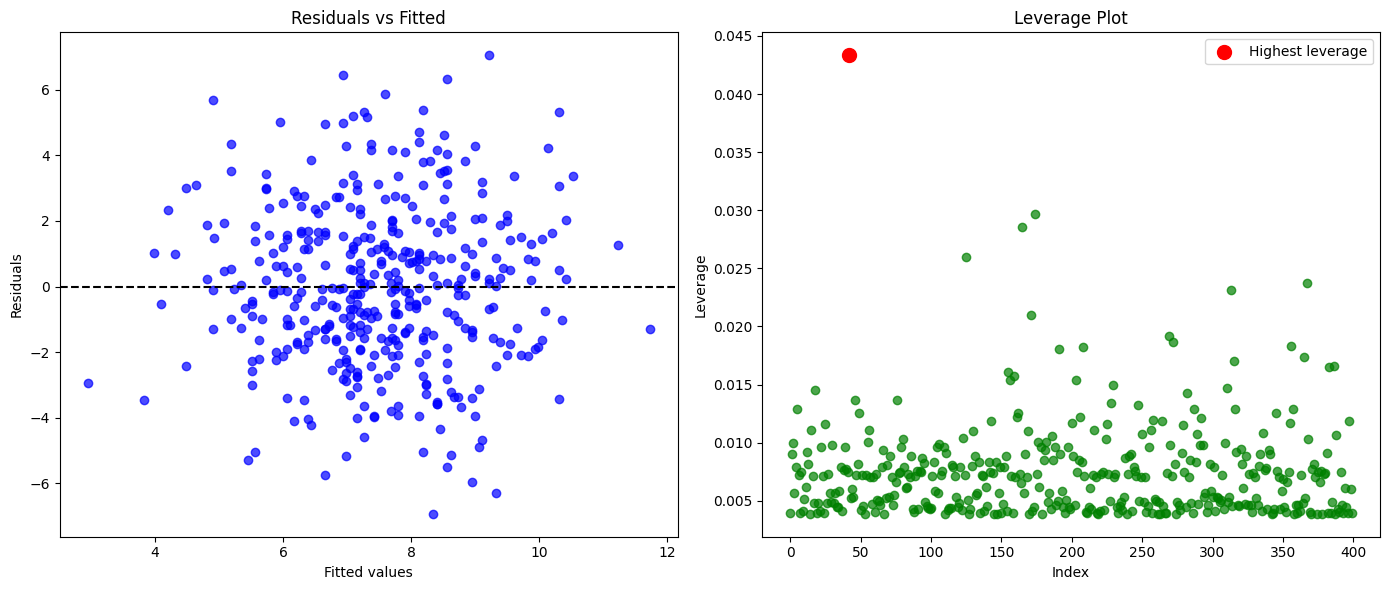

In [30]:
import matplotlib.pyplot as plt

# Assume results is your fitted sm.OLS model
infl = simple_model.get_influence()
leverage = infl.hat_matrix_diag
residuals = simple_model.resid
fitted = simple_model.fittedvalues

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Residuals vs Fitted
axes[0].scatter(fitted, residuals, color='blue', alpha=0.7)
axes[0].axhline(0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted')

# 2️⃣ Leverage plot
axes[1].scatter(np.arange(len(leverage)), leverage, color='green', alpha=0.7)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Leverage')
axes[1].set_title('Leverage Plot')

# Highlight the most influential point in leverage plot
most_influential = np.argmax(leverage)
axes[1].scatter(most_influential, leverage[most_influential], color='red', s=100, label='Highest leverage')
axes[1].legend()

plt.tight_layout()
plt.show()

There is one point with high leverage point. As data is extreamly spreaded along model there is no evidence of outliers.  

In [31]:
%reset



Nothing done.


# Task 11

## Imports

In [32]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Data genearation

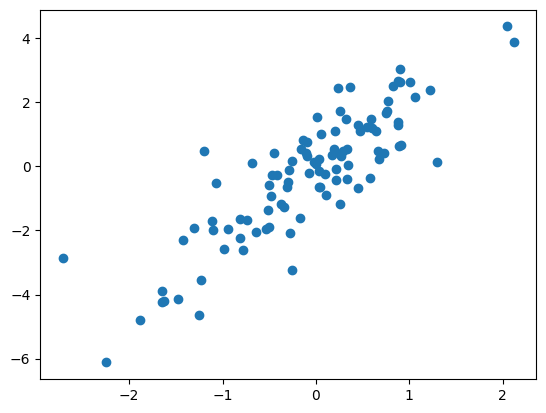

In [33]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

plt.scatter(x,y)

## Model without Intercept

In [34]:
model_1 = sm.OLS(y,x)
result_1 = model_1.fit()

print(summarize(result_1))

      coef  std err       t  P>|t|
x1  1.9762    0.117  16.898    0.0


### Comment
The x1 coef have quiet big standard error. However it have low t-statistic and p-value about 0. These two values are strongly against the null hypothesis. 

## Model with Intercept

In [35]:
x_i = sm.add_constant(x, prepend=False)
model_2 = sm.OLS(y, x_i)
result_2 = model_2.fit()

print(summarize(result_2))

         coef  std err       t  P>|t|
x1     1.9686    0.118  16.734  0.000
const -0.0760    0.101  -0.756  0.451


### Comment
The statistics of x1 coef are the same as in model without interception. Speaking of interception statistic the standard error is a bit lower than in x1 coef. The t-statistic is close to o and p-value about 0.45 that is extreamly high value. The p-value close to 0.5 suggest that the probability of null hypothesis being low is the same as throwing a coin. 

## Comprahansion
Focusing on p-values of constant (interception) and x1 coef we can clearly see that interception does not have any criucial impact on estimating data relation function. These assumption is also supported by interception coef value that is lower than 0.1.

As coef of interception is so low the model with interception estimates the functon the same way as model without it.

## T-statistic
The formula for t-statistic:
$$
SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^{n} (y_i - x_i\hat{\beta})^2}{(n-1)\sum_{i'=1}^{n} x_{i'}^2}}
$$
could be also written as:
$$
\frac{(\sqrt{n}-1) \sum_{i=1}^{n} x_i y_i}{\sqrt{(\sum_{i=1}^{n} x_i^2)(\sum_{i'=1}^{n} y_{i'}^2) - (\sum_{i'=1}^{n} x_{i'} y_{i'})^2}}
$$

### Arguing that x onto y and y onto x t-statistic is the same
As it is to notice in dominator we used excluded $y_{i'}$ values multiplaied by included $x_i$ values. As we do x onto y the taken into formula $X$ and $Y$ values will be different. 

(As also you can spot that if data relation is cleary y=a*x that changes nothing)


## The t-statistic for inverted regression with constant (interception)

### y onto x

In [36]:
print(summarize(result_2))

         coef  std err       t  P>|t|
x1     1.9686    0.118  16.734  0.000
const -0.0760    0.101  -0.756  0.451


### x onto y

In [37]:
y_i = sm.add_constant(y, prepend=False) 
model3 = sm.OLS(x,y_i);
results_3 = model3.fit()

print(summarize(results_3))

         coef  std err       t  P>|t|
x1     0.3763    0.022  16.734  0.000
const  0.0095    0.044   0.216  0.829


In [38]:
%reset

Nothing done.


# Task 12

## imports 

In [39]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [40]:
# we must keep values the same
rng = np.random.default_rng(1)
error = rng.normal(size=100) 
x = rng.normal(size=100)


def task12_check(a):
    global x
    global error
    
    y = a * x  +  error

    results1 = sm.OLS(y, x).fit()
    results2 = sm.OLS(x, y).fit()

    plt.scatter(x,y)    
    
    print("y onto x");
    print(summarize(results1))
    print()
    print("x onto y");
    print(summarize(results2))    

    

## The same coef for x onto y as for y onto x
for y onto x:
$$
\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2}
$$
as the numerator in both coef calculation is the same. Only the denominator must be equal.


So the sum of squares must be the same. 
$$
\sum x_i^2 = \sum y_i^2
$$

In more geometrical explenation they must be similary oriented around 0.



### Different coefficients

y onto x
      coef  std err       t  P>|t|
x1  3.9825    0.086  46.128    0.0

x onto y
      coef  std err       t  P>|t|
x1  0.2399    0.005  46.128    0.0


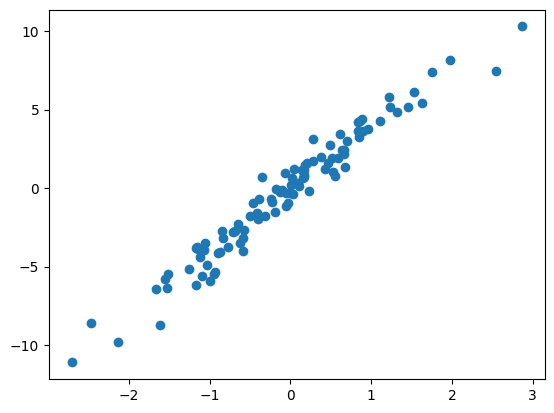

In [41]:
task12_check(4)

### Same coefficients

y onto x
      coef  std err      t  P>|t|
x1  0.2325    0.086  2.693  0.008

x onto y
      coef  std err      t  P>|t|
x1  0.2935    0.109  2.693  0.008


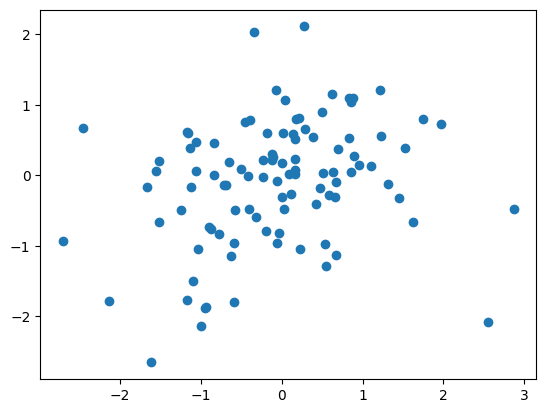

In [42]:
task12_check(0.25)

In [43]:
%reset

Nothing done.


# Task 13

## Imports

In [44]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Data set generation

The data is generated by linear relation defined as
$$
Y = \beta_0 + \beta_1 \times X + \epsilon
$$
where
- $\beta_0 = -1$
- $\beta_1 = 0.5$


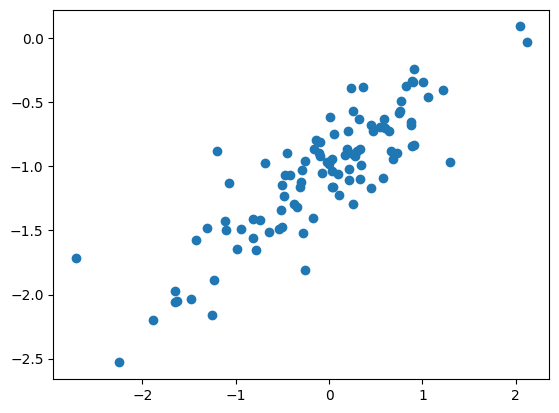

In [45]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
epsilon = rng.normal(0, 0.25, size=100)
y = -1 + 0.5*x + epsilon

plt.scatter(x,y)

## Fitting a linear model

In [46]:
x_c = sm.add_constant(x, prepend=False)
linear_model = sm.OLS(y, x_c)
linear_results = linear_model.fit()

print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           1.74e-30
Time:                        10:59:30   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4921      0.029     16.734      0.0

### Displaying a regression

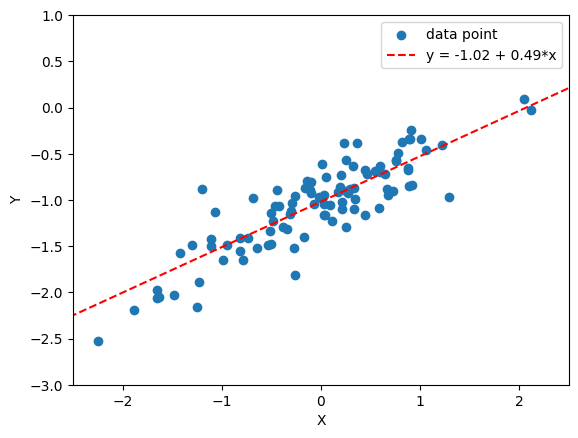

In [47]:
w, b = linear_results.params

plt.figure()
plt.scatter(x,y, label="data point")

X = np.array([-10 , 0 , 10])
Y = b + w*X
plt.plot(X,Y, color='red', linestyle='--', label=f"y = {round(b,2)} + {round(w,2)}*x")
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-2.5,2.5])
plt.ylim([-3, 1])
plt.legend()




## Fitting a Polynomail model

In [48]:
data = {"y": y, "x":x}
formula = "y ~ np.power(x,2)"

p_results = ols(formula=formula, data=data).fit()

print(p_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     10.12
Date:                Sun, 16 Nov 2025   Prob (F-statistic):            0.00197
Time:                        10:59:30   Log-Likelihood:                -65.018
No. Observations:                 100   AIC:                             134.0
Df Residuals:                      98   BIC:                             139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9634      0.055    -17.

### Comment
There is no evidence that quadratic model is better as it has the same confidence interval for parameters. In addition the p-value of x coef is slightly bigger than in linear model.

## More noisy data set

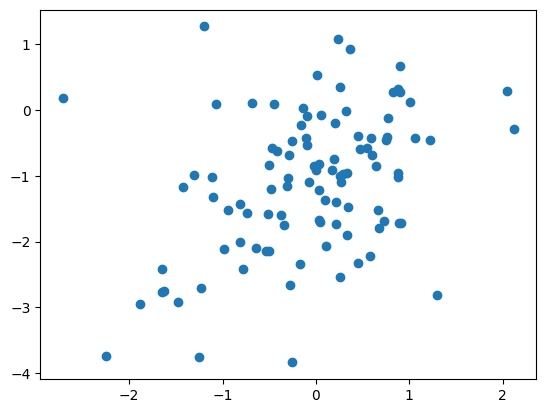

In [49]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
epsilon = rng.normal(0, 1, size=100)
y = -1 + 0.5*x + epsilon

plt.scatter(x,y)

In [50]:
x_c = sm.add_constant(x, prepend=False)
linear_model = sm.OLS(y, x_c)
linear_results = linear_model.fit()

print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     15.87
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           0.000131
Time:                        10:59:31   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4686      0.118      3.983      0.0

### Displaying a regression

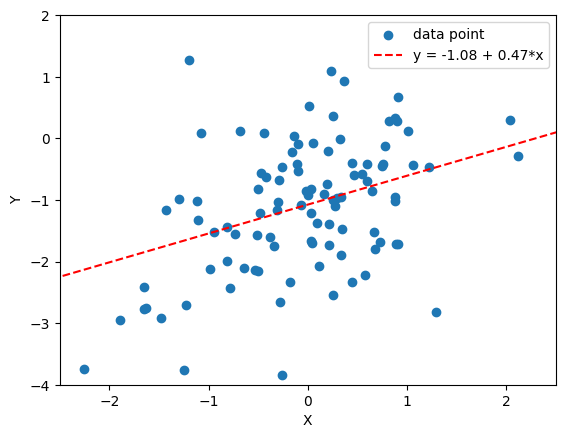

In [51]:
w, b = linear_results.params

plt.figure()
plt.scatter(x,y, label="data point")

X = np.array([-10 , 0 , 10])
Y = b + w*X
plt.plot(X,Y, color='red', linestyle='--', label=f"y = {round(b,2)} + {round(w,2)}*x")
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-2.5,2.5])
plt.ylim([-4, 2])
plt.legend()

### Comment
Even for more spreaded (noisy) data the model parameters stay nearly the same. The confidence intervals are excatly the same as is less noisy fit.

In [52]:
%reset


Nothing done.


# Task 14

## Imports

In [53]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Generating a data set

In [54]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)


## Plot of collinear x1 and x2

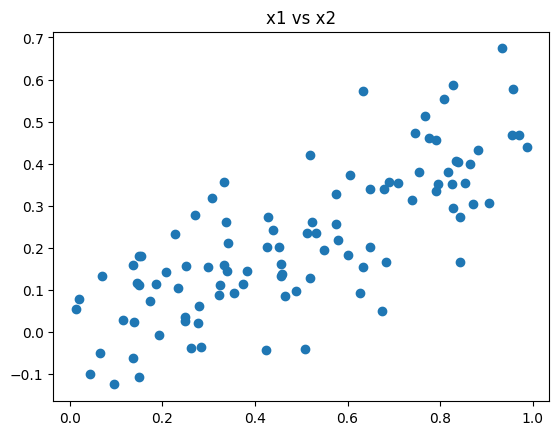

In [55]:
plt.scatter(x1,x2)
plt.title("x1 vs x2")
plt.show()

## fitting a model with x1 and x2

In [56]:
data = {"y": y, "x1":x1, "x2":x2}
formula = "y ~ x1 + x2"

results1 = ols(formula=formula, data=data).fit()
print(summarize(results1))
                                                  

             coef  std err       t  P>|t|
Intercept  1.9579    0.190  10.319  0.000
x1         1.6154    0.527   3.065  0.003
x2         0.9428    0.831   1.134  0.259


### Comment
As p-value of x1 coef is less than 0.05 we can rejejct the null hypothesis for it. However for x2 coef p-value exceeding 0.25 definetly supports the null hypothesis

## fitting a model with x1 only

In [57]:
formula = "y ~ x1"

results2 = ols(formula=formula, data=data).fit()
print(summarize(results2))

             coef  std err       t  P>|t|
Intercept  1.9371    0.189  10.242    0.0
x1         2.0771    0.335   6.196    0.0


### Comment
We can reject the null hypothesis as p-value of x1 coef is about 0

## fitting a model with x2 only

In [58]:
formula = "y ~ x2"

results3 = ols(formula=formula, data=data).fit()
print(summarize(results3))

             coef  std err       t  P>|t|
Intercept  2.3239    0.154  15.124    0.0
x2         2.9103    0.550   5.291    0.0


### Comment
We can reject the null hypothesis as p-value of x2 coef is about 0.

As for collinear predictors there is no big difference in choosing one of them as the other one is a linear combination of it. Choosing both them seems pointless.

## Concatenate - additional observation

In [59]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])


### Reffiting x1 and x2 model

In [60]:
data = {"y": y, "x1":x1, "x2":x2}
formula = "y ~ x1 + x2"

results1_r = ols(formula=formula, data=data).fit()
print(summarize(results1_r))
                            

             coef  std err       t  P>|t|
Intercept  2.0618    0.192  10.720  0.000
x1         0.8575    0.466   1.838  0.069
x2         2.2663    0.705   3.216  0.002


### Reffiting x1 only model

In [61]:
formula = "y ~ x1"

results2_r = ols(formula=formula, data=data).fit()
print(summarize(results2_r))

             coef  std err       t  P>|t|
Intercept  2.0739    0.201  10.310    0.0
x1         1.8760    0.358   5.236    0.0


### Reffiting x2 only model

In [62]:
formula = "y ~ x2"

results3_r = ols(formula=formula, data=data).fit()
print(summarize(results3_r))

             coef  std err       t  P>|t|
Intercept  2.2840    0.151  15.088    0.0
x2         3.1458    0.524   6.008    0.0


### Comment
The new point slightly increased a value of all coef-s. We can assume this is a high levrage point. Theofore it s hard to say if new observation is outlier.

We can just plot a new data.



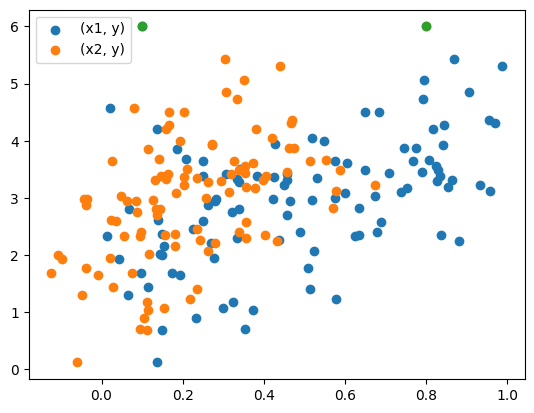

In [63]:
plt.figure()
plt.scatter(x1,y, label="(x1, y)")
plt.scatter(x2,y, label="(x2, y)")
plt.scatter([0.1, 0.8],[6,6]) # outliers
plt.legend() 

In [64]:
%reset


Nothing done.


# Task 15

## Imports

In [65]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from ISLP import load_data
from statsmodels.formula.api import ols
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Data

In [66]:
data = load_data('Boston')

data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.4580,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.5240,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.5240,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


## fitting a simple regression for each dataset


In [67]:
def simple_regression(data, name):
    formula = f"crim ~ {name} "
    results = ols(formula=formula, data=data).fit()

    desc= f"crim = b + w * {name}"
    print(f":{desc}\n{summarize(results)}\n-------\n\n")

    data_list = {
    'b' : results.params['Intercept'],
    'w' : results.params[name],
    'name': name,
    'x_data': data['crim'],
    'y_data': data[name],
    'description': desc
    }
    
    
    
    return data_list
    

In [68]:
X = list(data.loc[:, data.columns != 'crim'].columns)
data_lists = []

for n in X:
    f = simple_regression(data, n)
    data_lists.append(f)


:crim = b + w * zn
             coef  std err       t  P>|t|
Intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
-------


:crim = b + w * indus
             coef  std err      t  P>|t|
Intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
-------


:crim = b + w * chas
             coef  std err      t  P>|t|
Intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
-------


:crim = b + w * nox
              coef  std err       t  P>|t|
Intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
-------


:crim = b + w * rm
              coef  std err      t  P>|t|
Intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
-------


:crim = b + w * age
             coef  std err      t  P>|t|
Intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
-------


:crim = b + w * dis
             coef  std err       t  P>|t|
Interce

### Comment
Looking only for statistic for predicted coefficients we can assume that models are working pretty well. The only thing that seems off is coef standard error in some of results.

## Ploting results

KeyboardInterrupt: 

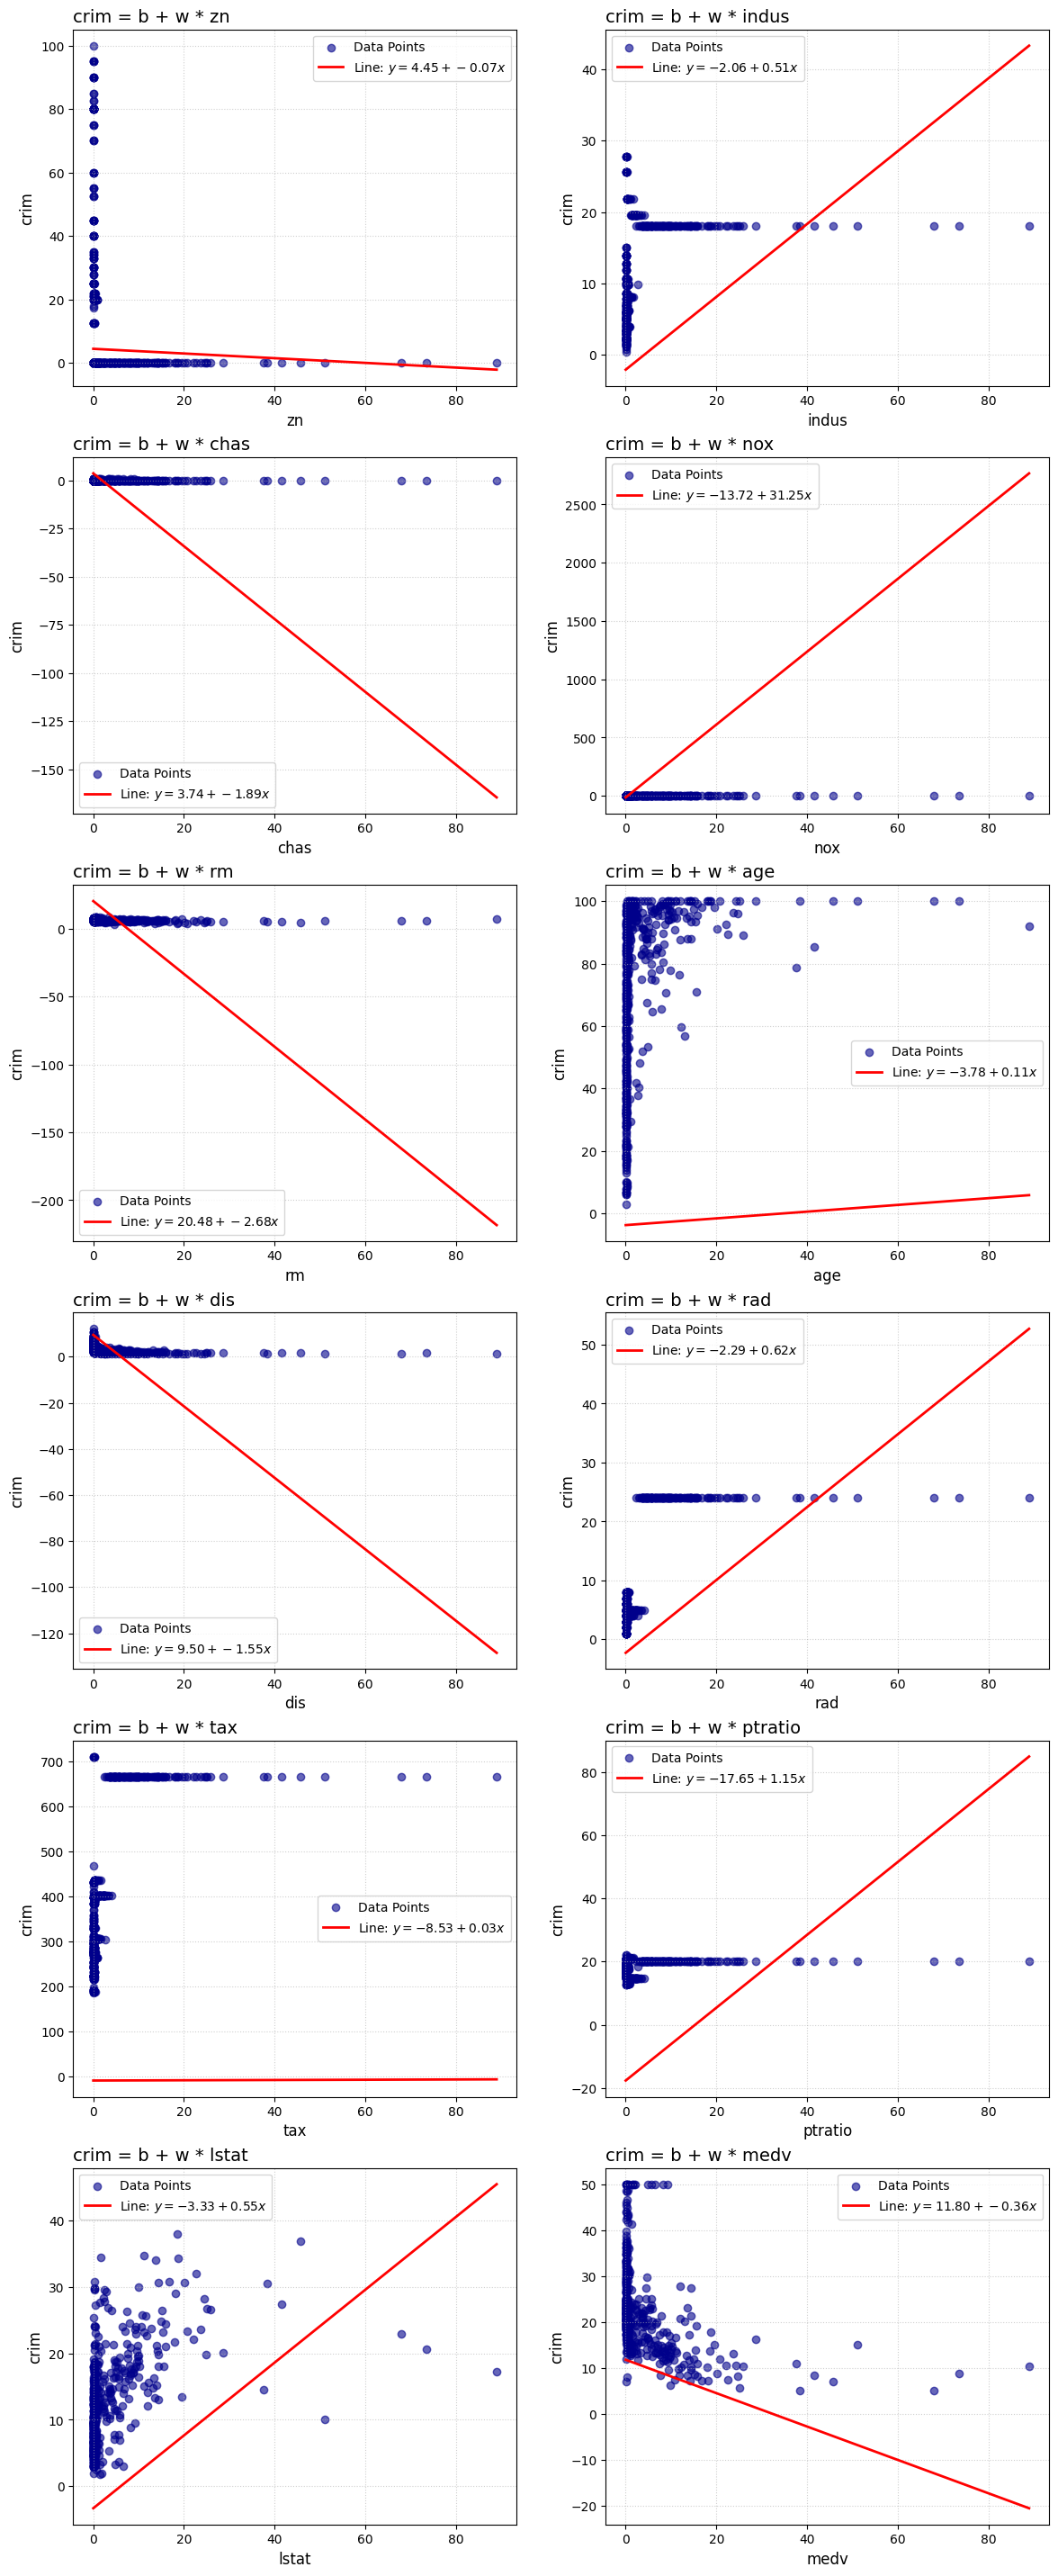

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def create_regression_subplots_with_data(data_list):
    """
    Creates a figure with a subplot for each entry in data_list.

    Each subplot contains a scatter plot of the provided data, 
    the regression line defined by b and w, and a custom description/title.

    Args:
        data_list (list of dict): A list where each dictionary has the 
                                  following keys:
                                  - 'b' (float): Intercept
                                  - 'w' (float): Slope
                                  - 'x_data' (np.array): X data points
                                  - 'y_data' (np.array): Y data points
                                  - 'description' (str): Custom plot title
    """
    
    # 1. Determine the number of subplots and grid dimensions
    N = len(data_list)
    ncols = 2  # Two columns as requested
    nrows = int(np.ceil(N / ncols)) 
    
    # 2. Create the figure and subplot grid
    # fig_size adjusted for better visualization
    fig, axes = plt.subplots(nrows, ncols, figsize=(14, 6 * nrows)) 
    
    # Ensure 'axes' is always a 2D array for consistent indexing
    if N == 1:
        # If only one plot, put it into a 2D array structure
        axes = np.array([[axes, None]]) 
    elif nrows == 1 and ncols > 1:
        # If only one row (2 plots max), reshape to 2D
        axes = axes.reshape(1, -1)

    # 3. Create the plotting loop
    for i, data in enumerate(data_list):
        b = data['b']
        w = data['w']
        x_data = data['x_data']
        y_data = data['y_data']
        description = data['description']
        predictor = data['name']
        response = 'crim'

        # Calculate the current row and column for the subplot
        row = i // ncols
        col = i % ncols
        ax = axes[row, col]

        # --- Calculate Regression Line ---
        # Create x-range for plotting the smooth line
        x_min, x_max = x_data.min(), x_data.max()
        x_line = np.linspace(x_min, x_max, 100)
        # Calculate the y values for the line
        y_line = b + w * x_line 

        # --- Plotting ---
        
        # 1. Scatter Plot of the data
        ax.scatter(x_data, y_data, label='Data Points', color='darkblue', alpha=0.6)
        
        # 2. Regression Line Plot
        ax.plot(x_line, y_line, label=f'Line: $y = {b:.2f} + {w:.2f}x$', 
                color='red', linewidth=2, linestyle='-')
        
        # --- Description and Formatting ---
        
        # Use the custom description in the title
        ax.set_title(f'{description}', 
                     fontsize=14, loc='left')
        ax.set_xlabel(predictor, fontsize=12)
        ax.set_ylabel(response, fontsize=12)
        ax.legend(loc='best')
        ax.grid(True, linestyle=':', alpha=0.6)
        
    # 4. Handle any unused subplots
    if N % ncols != 0:
        for j in range(N % ncols, ncols):
            fig.delaxes(axes[nrows - 1, j])

    # 5. Final Display Adjustments
    plt.tight_layout(pad=3.0) 
    plt.show()


create_regression_subplots_with_data(data_lists)

### Comments
as is easy to notice the data is not linear and linear predictions are not working well.